# Programming Exercise 1: Linear Regression

In [1]:
# imports here

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

## Plotting the Data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)

In [2]:
data = pd.read_csv("ex1data1.txt", sep=",", header=None, names=['X', 'y'])
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
m = data.shape[0]
m

97

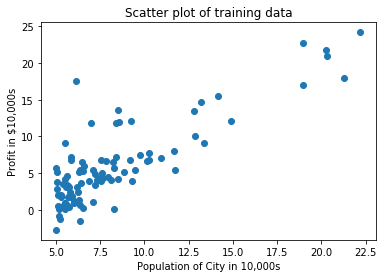

In [4]:
plt.scatter(data['X'], data['y'])
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s');
plt.title('Scatter plot of training data')
plt.show()

## Gradient Descent
In this part, you will fit the linear regression parameters θ to our dataset using gradient descent.

### Update Equations
The objective of linear regression is to minimize the cost function $J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta }(x^{(i)})-y^{(i)})^{2}$ where the hypothesis $h_{\theta }(x)$ is given by the linear model $h_{\theta }(x) = \theta ^{T}x = \theta _{0} + \theta _{1}x_{1}$.

Recall that the parameters of your model are the $\theta_{j}$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update $\theta_{j} := \theta_{j} - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_{\theta }(x^{(i)})-y^{(i)})x_{j}^{(i)}$   (simultaneously update $\theta_{j}$ for all j).

With each step of gradient descent, your parameters $\theta_{j}$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [5]:
X = data['X']
y = data['y']

### Implementation
We store each example as a row in the the X matrix. To take into account the intercept term ($\theta _{0}$), we add an additional first column to X and set it to all ones. This allows us to treat $\theta _{0}$ as simply another ‘feature’.

We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

In [6]:
ones = pd.DataFrame(np.ones((m, 1)), columns=['ones'])
X = pd.concat([ones, X], axis=1) # Add a column of ones to X

theta = np.zeros((2, 1)) # initialize fitting parameters

iterations = 1500
alpha = 0.01

In [7]:
X.head()

,ones,X
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598


### Computing the cost $J(\theta)$
As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

Remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set.

In [8]:
# Compute Cost

def computeCost(X, y, theta):
    m = y.shape[0]
    h_theta = np.matmul(X, theta)
    error = h_theta - y.values.reshape((m, 1))
    error_square = np.matmul(error.T, error)
    J = error_square / (2*m)
    
    return J

computeCost(X, y, theta)[0][0]

32.07273387745567

Once you have completed the function, the next step is to run computeCost once using θ initialized to zeros, and you will see the cost printed to the screen.

You should expect to see a cost of 32.07.

### Gradient descent

In [9]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        h_theta = np.matmul(X, theta)
        error = h_theta - y.values.reshape((m, 1))
        theta_change = alpha * np.matmul(X.T, error) / m
        theta = theta - theta_change
        
        J_history[i] = computeCost(X, y, theta)
        
    return (theta, J_history)

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

theta

array([[-3.63029144],
       [ 1.16636235]])

### Predict values for population sizes of 18,000 and 25,000

In [10]:
predict1 = np.matmul([1, 1.8], theta)
predict1*10000

array([-15308.392088])

In [11]:
predict2 = np.matmul([1, 2.5], theta)
predict2*10000

array([-7143.85563565])

### Training data with linear regression fit

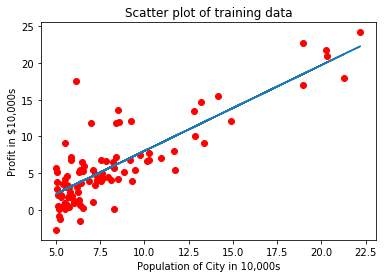

In [12]:
plt.scatter(data['X'], data['y'], color='red')
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s');
plt.title('Scatter plot of training data')
plt.plot(data['X'], [theta[0] + theta[1]*x for x in data['X']])
plt.show()

# Optional Exercises

## Linear regression with multiple variables

In [13]:
data = pd.read_csv("ex1data2.txt", sep=",", header=None, names=['X1', 'X2', 'y'])
data.head()

,X1,X2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [14]:
X = pd.concat([data['X1'], data['X2']], axis=1)
y = data['y']

In [15]:
m = data.shape[0]
m

47

### Feature Normalization
By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Your task here is to:
  1. Subtract the mean value of each feature from the dataset.
  2. After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [16]:
def featureNormalize(X):
    mu = np.mean(X)
    sigma = np.std(X)
    
    X_norm = (X - mu)/sigma
    
    return (X_norm, mu, sigma)

X_norm, mu, sigma = featureNormalize(X)
X_norm.head()

,X1,X2
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205


In [17]:
ones = pd.DataFrame(np.ones((m, 1)), columns=['ones'])
X = pd.concat([ones, X_norm], axis=1) # Add a column of ones to X

In [18]:
X.head()

,ones,X1,X2
0,1.0,0.131415,-0.226093
1,1.0,-0.509641,-0.226093
2,1.0,0.507909,-0.226093
3,1.0,-0.743677,-1.554392
4,1.0,1.271071,1.102205


### Compute Cost

In [19]:
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))

# Compute Cost---Copy from above
def computeCost(X, y, theta):
    m = y.shape[0]
    h_theta = np.matmul(X, theta)
    error = h_theta - y.values.reshape((m, 1))
    error_square = np.matmul(error.T, error)
    J = error_square / (2*m)
    
    return J

computeCost(X, y, theta)

array([[6.55915481e+10]])

### Gradient Descent

In [20]:
# Compute Gradient Descent---Copy from above
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        h_theta = np.matmul(X, theta)
        error = h_theta - y.values.reshape((m, 1))
        theta_change = alpha * np.matmul(X.T, error) / m
        theta = theta - theta_change
        
        J_history[i] = computeCost(X, y, theta)
        
    return (theta, J_history)

theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

theta

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

In [21]:
print("h(x) = "+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+" * x1 + "+str(round(theta[2,0],2))+" * x2")

h(x) = 334302.06 + 99411.45 * x1 + 3267.01 * x2


In [22]:
computeCost(X, y, theta)

array([[2.10544829e+09]])

### Plotting of $J(\theta)$ vs Iteration

Text(0.5,1,'Cost function using Gradient Descent')

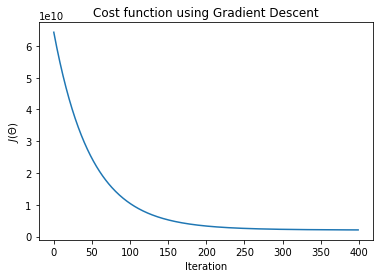

In [23]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Estimate the price of a 1650 sq-ft, 3 br house

In [24]:
x_sample = featureNormalize(np.array([1650,3]))[0]
x_sample = np.append(np.ones(1), x_sample)
np.matmul(x_sample, theta)[0]

430446.5006128006